<a href="https://colab.research.google.com/github/ak7599/DL_regression/blob/main/dl_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.shape

(545, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


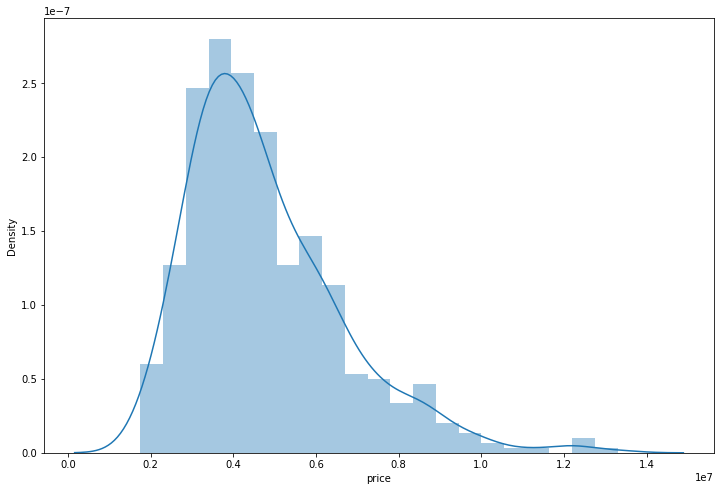

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

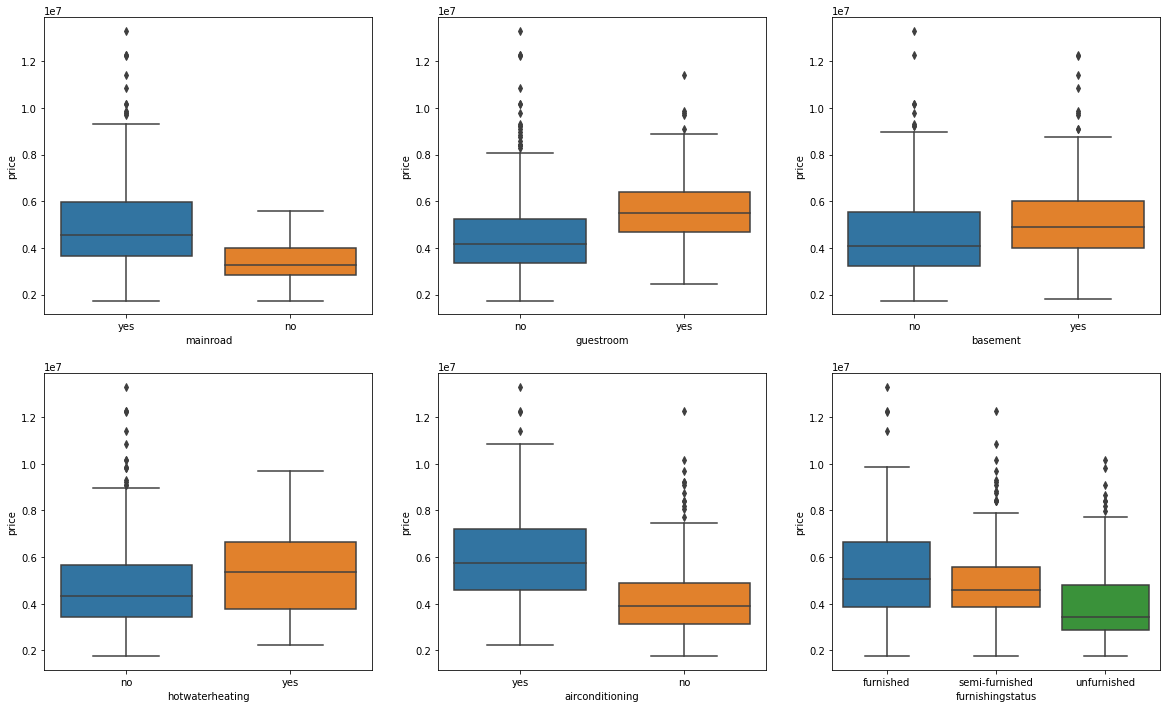

In [ ]:
#visualizing categorical columns
#Bivariate Analysis(box plot,bar plot,scatter plot)
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='mainroad',y='price',data=df)

plt.subplot(2,3,2)
sns.boxplot(x='guestroom',y='price',data=df)

plt.subplot(2,3,3)
sns.boxplot(x='basement',y='price',data=df)

plt.subplot(2,3,4)
sns.boxplot(x='hotwaterheating',y='price',data=df)

plt.subplot(2,3,5)
sns.boxplot(x='airconditioning',y='price',data=df)

plt.subplot(2,3,6)
sns.boxplot(x='furnishingstatus',y='price',data=df)

In [ ]:
#lets check the correaltion betn columns with heatmap
x=df.corr()
x

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


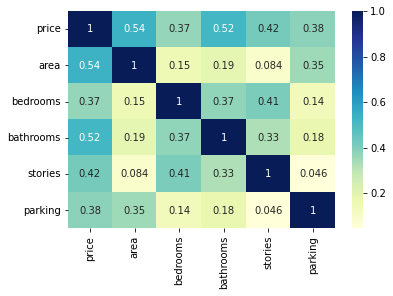

In [ ]:

sns.heatmap(x,annot=True,cmap='YlGnBu')

In [ ]:

#it it cleared from heatmap the correlation betn area and price is max

In [ ]:
#Data preprocessing
#convert binary categorical variables to 0 and 1
#convert other categorical variables to dummy variables
varlist=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
df[varlist]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [ ]:

df[varlist]=df[varlist].apply(lambda x:x.map({'yes':1,'no':0}))

In [ ]:
df[varlist]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [ ]:
x=pd.get_dummies(df['furnishingstatus'],drop_first=True)
x

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [ ]:
df=pd.concat([df,x],axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [ ]:
df=df.drop('furnishingstatus',axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            545 non-null    int64
 1   area             545 non-null    int64
 2   bedrooms         545 non-null    int64
 3   bathrooms        545 non-null    int64
 4   stories          545 non-null    int64
 5   mainroad         545 non-null    int64
 6   guestroom        545 non-null    int64
 7   basement         545 non-null    int64
 8   hotwaterheating  545 non-null    int64
 9   airconditioning  545 non-null    int64
 10  parking          545 non-null    int64
 11  prefarea         545 non-null    int64
 12  semi-furnished   545 non-null    uint8
 13  unfurnished      545 non-null    uint8
dtypes: int64(12), uint8(2)
memory usage: 52.3 KB


In [ ]:
# Train-Test-Split

In [ ]:
X = df.drop('price',axis=1)
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(381, 13)

In [ ]:
X_test.shape

(164, 13)

In [ ]:
# Creating a model

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

In [ ]:
model=keras.models.Sequential([
    keras.layers.Dense(13,activation='relu'),
    keras.layers.Dense(13,activation='relu'),
    keras.layers.Dense(13,activation='relu'),
    keras.layers.Dense(13,activation='relu'),
    keras.layers.Dense(1)
    ])

In [ ]:
model.compile(optimizer='adam',loss='mse')

In [ ]:
# Training the model

In [ ]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=32,epochs=800)

Epoch 1/800
12/12 [==============================] - 0s 12ms/step - loss: 1090103148544.0000 - val_loss: 1268031160320.0000
Epoch 2/800
12/12 [==============================] - 0s 8ms/step - loss: 1089762623488.0000 - val_loss: 1267783696384.0000
Epoch 3/800
12/12 [==============================] - 0s 8ms/step - loss: 1089940226048.0000 - val_loss: 1267411714048.0000
Epoch 4/800
12/12 [==============================] - 0s 9ms/step - loss: 1089864007680.0000 - val_loss: 1267556679680.0000
Epoch 5/800
12/12 [==============================] - 0s 8ms/step - loss: 1090148958208.0000 - val_loss: 1269098479616.0000
Epoch 6/800
12/12 [==============================] - 0s 9ms/step - loss: 1090091089920.0000 - val_loss: 1267798114304.0000
Epoch 7/800
12/12 [==============================] - 0s 8ms/step - loss: 1089234731008.0000 - val_loss: 1268186087424.0000
Epoch 8/800
12/12 [==============================] - 0s 8ms/step - loss: 1090480373760.0000 - val_loss: 1269284864000.0000
Epoch 9/800
12/

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses

,loss,val_loss
0,1.090103e+12,1.268031e+12
1,1.089763e+12,1.267784e+12
2,1.089940e+12,1.267412e+12
3,1.089864e+12,1.267557e+12
4,1.090149e+12,1.269098e+12
...,...,...
795,1.066931e+12,1.259844e+12
796,1.066972e+12,1.259913e+12
797,1.067076e+12,1.260323e+12
798,1.066830e+12,1.260266e+12


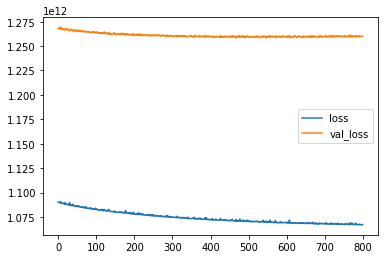

In [ ]:
losses.plot()

In [ ]:
# Evaluation on Test Data

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [ ]:
X_test

array([[0.32689655, 0.2       , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.2       , 0.4       , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.17931034, 0.4       , 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.29655172, 0.6       , 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.39875862, 0.4       , 0.33333333, ..., 1.        , 0.        ,
        0.        ],
       [0.0937931 , 0.4       , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
predictions = model.predict(X_test)

In [ ]:
mean_absolute_error(y_test,predictions)

817970.650152439

In [ ]:
np.sqrt(mean_squared_error(y_test,predictions))

1122508.9524508638

In [ ]:
df['price'].mean()

4766729.247706422

In [ ]:
explained_variance_score(y_test,predictions)

0.6153014303713258

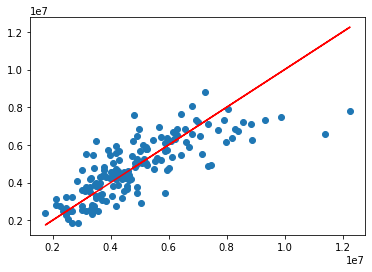

In [ ]:
# Our predictions
plt.scatter(y_test,predictions)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [ ]:
y_test.shape

(164,)

In [ ]:
errors = y_test.values.reshape(164, 1) - predictions

In [ ]:
errors

array([[-6.70106500e+05],
       [ 2.62196050e+06],
       [ 2.52573100e+06],
       [-1.07134900e+06],
       [-8.65199500e+05],
       [ 3.35633250e+05],
       [ 5.81205000e+05],
       [ 2.10780500e+05],
       [-9.39631000e+05],
       [-5.57563500e+05],
       [-5.15052000e+05],
       [ 2.40143650e+06],
       [-8.81291500e+05],
       [-4.41724500e+05],
       [-1.01756000e+05],
       [-5.62904000e+05],
       [-2.36884700e+06],
       [-2.74472000e+05],
       [ 1.06570850e+06],
       [ 9.31947500e+05],
       [ 1.23175000e+06],
       [ 1.29208900e+06],
       [ 4.48719000e+05],
       [ 2.06243500e+05],
       [ 7.33221250e+05],
       [ 2.07096000e+05],
       [ 4.83379000e+05],
       [ 7.16025000e+03],
       [ 2.99138250e+05],
       [ 2.48435000e+06],
       [-4.35974500e+05],
       [-1.02943775e+06],
       [ 1.46006150e+06],
       [ 6.48262750e+05],
       [-8.26937000e+05],
       [ 5.77962500e+05],
       [ 5.67600000e+03],
       [-2.79981950e+06],
       [-3.1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


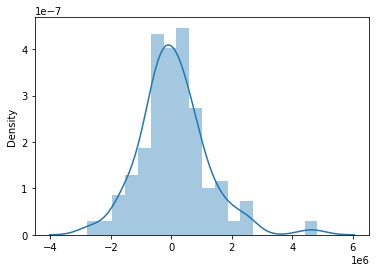

In [ ]:
sns.distplot(errors)

In [ ]:
# Predicting on a brand new house

In [ ]:
df.loc[0]

price              13300000
area                   7420
bedrooms                  4
bathrooms                 2
stories                   3
mainroad                  1
guestroom                 0
basement                  0
hotwaterheating           0
airconditioning           1
parking                   2
prefarea                  1
semi-furnished            0
unfurnished               0
Name: 0, dtype: int64

In [ ]:
single_house = df.drop('price',axis=1).iloc[0]

In [ ]:
single_house

area               7420
bedrooms              4
bathrooms             2
stories               3
mainroad              1
guestroom             0
basement              0
hotwaterheating       0
airconditioning       1
parking               2
prefarea              1
semi-furnished        0
unfurnished           0
Name: 0, dtype: int64

In [ ]:
single_house = scaler.transform(single_house.values.reshape(-1, 13))

AttributeError: ignored

In [ ]:
model.predict(single_house)

array([[8213261.5]], dtype=float32)

In [ ]:
df.iloc[0]

price              13300000
area                   7420
bedrooms                  4
bathrooms                 2
stories                   3
mainroad                  1
guestroom                 0
basement                  0
hotwaterheating           0
airconditioning           1
parking                   2
prefarea                  1
semi-furnished            0
unfurnished               0
Name: 0, dtype: int64